In [55]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt



%matplotlib inline

red_wine_path = 'red_wine.csv'
white_wine_path = 'white_wine.csv'

red_wine_df = pd.read_csv(red_wine_path)
white_wine_df = pd.read_csv(white_wine_path)

red_wine_df.head(), white_wine_df.head()

(   citric acid  sulphates  alcohol  type
 0         0.49       0.63      8.0   low
 1         0.66       0.57      8.3   low
 2         0.23       0.44      8.5  high
 3         0.44       0.84      8.6   low
 4         0.08       0.50      8.7   low,
    citric acid  sulphates  alcohol type
 0         0.24       0.52      9.4  low
 1         0.49       0.56      9.4  low
 2         0.66       0.73     10.0  low
 3         0.32       0.77     10.0  low
 4         0.38       0.82     10.0  low)

In [57]:
red_wine_profile = ProfileReport(red_wine_df, title="Red Wine Dataset Profiling Report", explorative=True)
red_wine_profile.to_file("red_wine_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
white_wine_profile = ProfileReport(white_wine_df, title="White Wine Dataset Profiling Report", explorative=True)
white_wine_profile.to_file("white_wine_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
le = LabelEncoder()
red_wine_df['type_encoded'] = le.fit_transform(red_wine_df['type'])

X = red_wine_df.drop(columns=['type', 'type_encoded'])
y = red_wine_df['type_encoded']

kf = KFold(n_splits=10, shuffle=True, random_state=42)

models = {
    'Baseline': DummyClassifier(strategy="most_frequent"),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

results = []

for model_name, model in models.items():
    auc_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results.append({
        "Model": model_name,
        "AUC Score (10-Fold CV)": np.mean(auc_scores),
        "Accuracy (10-Fold CV)": np.mean(accuracy_scores)
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  AUC Score (10-Fold CV)  Accuracy (10-Fold CV)
0             Baseline                0.500000               0.529068
1  Logistic Regression                0.883773               0.788113
2          Naive Bayes                0.898355               0.819661
3        Decision Tree                0.811147               0.812553
4           SVM-Linear                0.882741               0.793376
5              SVM-RBF                0.861241               0.541349
6        Random Forest                0.926733               0.851149


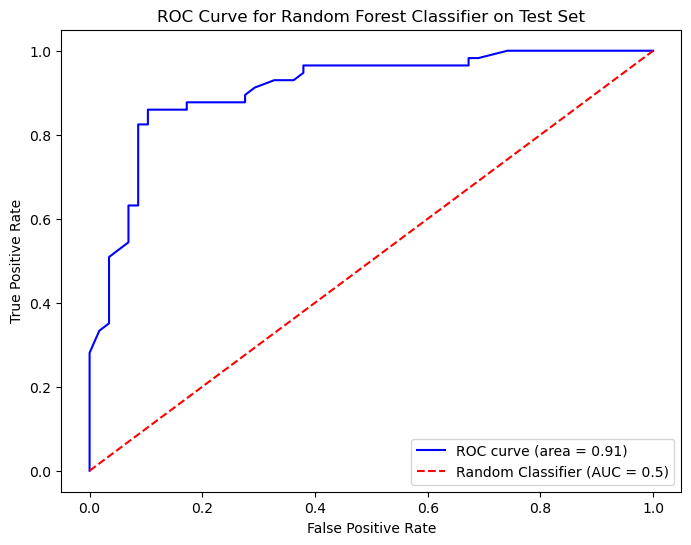

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier on Test Set")
plt.legend(loc="lower right")
plt.show()


In [65]:
white_wine_df = pd.read_csv("white_wine.csv") 

X_white = white_wine_df.drop(columns=["type"]) 
y_white = le.transform(white_wine_df["type"])  

X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

rf_model_white = RandomForestClassifier()
rf_model_white.fit(X_train, y_train)

y_prob_test = rf_model_white.predict_proba(X_test)[:, 1]

white_wine_auc = roc_auc_score(y_test, y_prob_test)
print(f"White Wine Test AUC Score : {white_wine_auc}")


White Wine Test AUC Score : 0.8363636363636364
